# 05. RANDOM FOREST & ĐÁNH GIÁ ĐỘ QUAN TRỌNG ĐẶC TRƯNG

## Feature Importance Analysis với Machine Learning

**Mục đích chính:**
- Huấn luyện mô hình Random Forest Regressor để dự đoán GDP_Growth
- Xác định tầm quan trọng tương đối của FDI và Trade_Openness
- So sánh khả năng dự đoán của các biến độc lập

**Thông số mô hình:**
- n_estimators = 100 (100 decision trees)
- max_depth = 10 (giới hạn độ sâu để tránh overfitting)
- Train-Test Split: 80%-20%

**Đánh giá:** R² Score, RMSE, Feature Importance (0-1 scale)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported!")

✅ Libraries imported!


In [2]:
df = pd.read_csv('../01_Data/02_Processed/ASEAN_Transformed_Data.csv')
print(f"✅ Data loaded: {df.shape}")

✅ Data loaded: (225, 13)


## Train Random Forest Model

In [3]:
# Prepare data
X = df[['FDI_log_scaled', 'Trade_Openness_log_scaled']]
y = df['GDP_Growth_scaled']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

print("✅ Random Forest model trained!")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

✅ Random Forest model trained!
R² Score: 0.1127
RMSE: 1.1103


## Feature Importance

In [4]:
importances = rf.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n📊 Feature Importance:")
print(importance_df)


📊 Feature Importance:
                     Feature  Importance
1  Trade_Openness_log_scaled    0.530329
0             FDI_log_scaled    0.469671


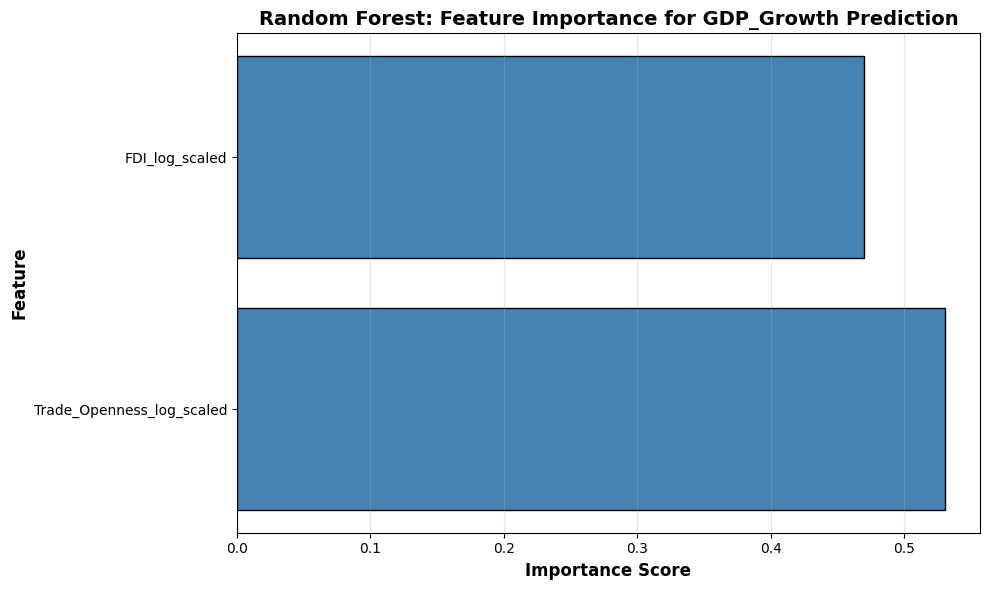


✅ Feature importance chart saved!


In [5]:
# Visualization
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], 
         color='steelblue', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Random Forest: Feature Importance for GDP_Growth Prediction', 
          fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../03_Results/08_RandomForest_FeatureImportance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Feature importance chart saved!")

## Interpretation

In [6]:
print("\n📊 Interpretation:")
print(f"- {importance_df.iloc[0]['Feature']}: {importance_df.iloc[0]['Importance']:.2%} importance")
print(f"- {importance_df.iloc[1]['Feature']}: {importance_df.iloc[1]['Importance']:.2%} importance")
print("\n💡 Higher importance → stronger predictive power for GDP_Growth")


📊 Interpretation:
- Trade_Openness_log_scaled: 53.03% importance
- FDI_log_scaled: 46.97% importance

💡 Higher importance → stronger predictive power for GDP_Growth


In [7]:
# Save results
importance_df.to_csv('../03_Results/RandomForest_FeatureImportance.csv', index=False)
print("\n✅ Random Forest analysis completed!")


✅ Random Forest analysis completed!
